# Plotting 

## Notebook to create plots with logged data

In [3]:
import os
from pathlib import Path
import pandas as pd
import common.plotting as plotting

<Figure size 7200x4800 with 0 Axes>

In [4]:
# create output path for plots
home_path = str(Path.home())
output_path = os.path.join(home_path, "Desktop", "runs")
if not os.path.exists(output_path):
    os.makedirs(output_path)

## Compare different runs (Single Agent)

In [6]:
files = ["/home/niko/Info/cablab/runs/ppo/33/logs.csv", "/home/niko/Info/cablab/runs/dqn/63/logs.csv", "/home/niko/Info/cablab/runs/dqn/64/logs.csv"]
ids = [["rewards"],["n_passengers"],["illegal_moves"],["avg_waiting_time"]]
labels = ["PPO", "DQN", "DQN (Munchhausen)"]
colors = ["orange", "blue", "green"]

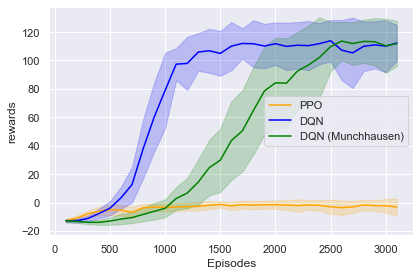

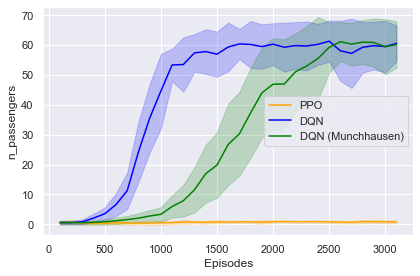

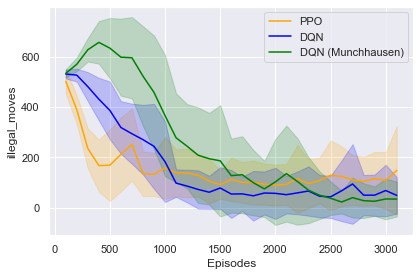

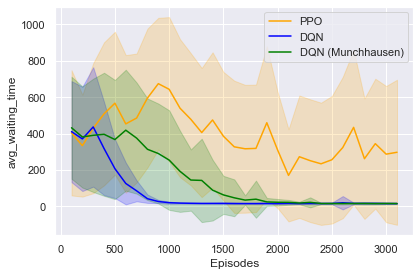

In [7]:
dfs = []
for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    df['illegal_moves'] = df['illegal_moves'] + df['illegal_pick_ups']
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

### Compare assigned vs not assigned passeners trained in Single Agent Environment

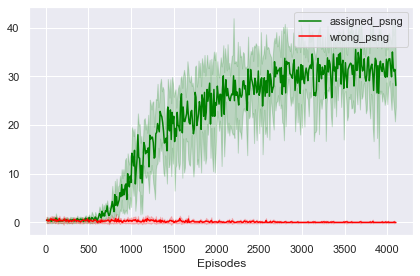

In [10]:
file = "/home/niko/Info/cablab/common/../runs/ma-dqn/38/logs1.csv"
df = pd.DataFrame()
df = pd.read_csv(file)
plotting.plot_values(df, ["assigned_psng","wrong_psng"], output_path)

## Compare differnt eval runs (Multi-Agent)

In [27]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/20/eval_opt/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/20/eval_sub/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/20/eval_rand/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/20/eval/logs_summed.csv"]

ids = [["avg_waiting_time"]]
labels = ["Opt", "Sub", "Rand", "Adv"]
colors = ["orange", "blue", "green", "purple"]

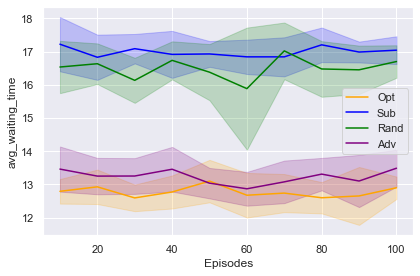

In [28]:
dfs = []

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

## Compare differnent training runs (Multi-Agent)

In [3]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/25/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/26/logs_summed.csv","/home/niko/Info/cablab/runs/ma-dqn/27/logs_summed.csv","/home/niko/Info/cablab/runs/ma-dqn/29/logs_summed.csv"]
ids = [["rewards"],["n_passengers"],["illegal_moves"],["useless_steps"]]
labels = ["Common", "Individual", "Individual + Info", "Common+Info"]
colors = ["orange", "blue", "red", "green"]

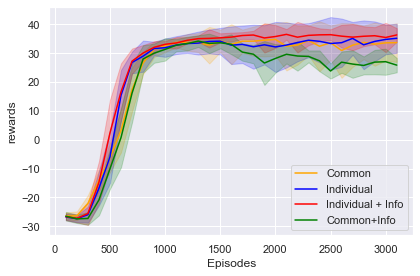

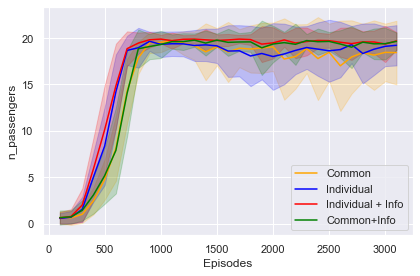

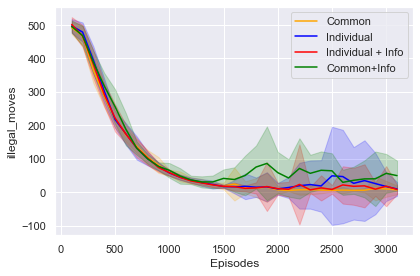

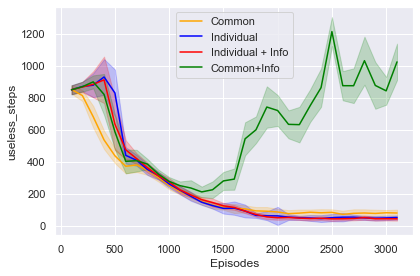

In [4]:
dfs = []
for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

## Compare eval runs (Multi-Agent)

In [5]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/25/eval/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/26/eval/logs_summed.csv","/home/niko/Info/cablab/runs/ma-dqn/27/eval/logs_summed.csv","/home/niko/Info/cablab/runs/ma-dqn/29/eval/logs_summed.csv"]
ids = [["rewards"],["n_passengers"],["illegal_moves"],["useless_steps"]]
labels = ["Common", "Individual", "Individual + Info", "Common+Info"]
colors = ["orange", "blue", "red", "green"]

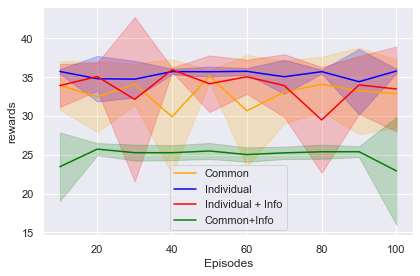

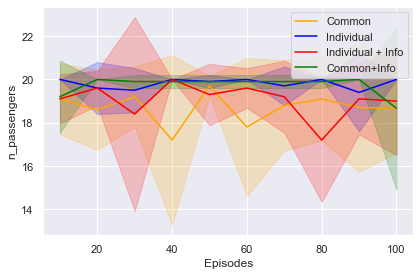

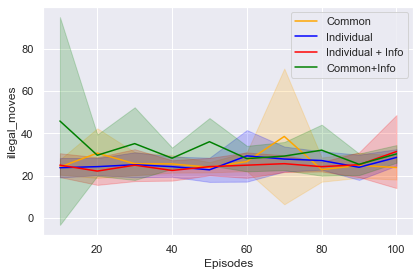

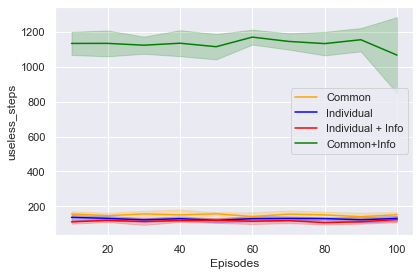

In [6]:
dfs = []

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

## Make average of multiple runs for same algorithm

In [ ]:
files = []
start_folder = 253
end_folder = 257
for i in range(start_folder, end_folder+1):
    files.append(f"/home/niko/Info/cablab/runs/dqn/{i}/logs.csv")

ids = ["rewards"]

In [ ]:
dfs = []
n_files = len(files)

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

plotting.plot_mult_runs(dfs, ids, output_path)

## SNS Plots

In [23]:
import seaborn as sns
import pandas as pd

dfs = []
smoothing = 25

In [24]:
files = ["/home/niko/Info/cablab/runs/ppo/13/logs.csv","/home/niko/Info/cablab/runs/ppo/15/logs.csv","/home/niko/Info/cablab/runs/ppo/17/logs.csv", "/home/niko/Info/cablab/runs/ppo/18/logs.csv","/home/niko/Info/cablab/runs/ppo/19/logs.csv" ]

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)

    df['algorithm'] = "PPO"
    df['episode'] = df.index + 1

    df['rewards'] = df['rewards'].rolling(smoothing,min_periods=1).mean() 
    df['n_passengers'] = df['n_passengers'].rolling(smoothing,min_periods=1).mean()
    df['illegal_moves'] = df['illegal_moves'].rolling(smoothing,min_periods=1).mean() 
    df['useless_steps'] = df['useless_steps'].rolling(smoothing,min_periods=1).mean() 

    dfs.append(df)       

In [25]:
files = ["/home/niko/Info/cablab/runs/dqn/81/logs.csv","/home/niko/Info/cablab/runs/dqn/82/logs.csv","/home/niko/Info/cablab/runs/dqn/83/logs.csv","/home/niko/Info/cablab/runs/dqn/84/logs.csv","/home/niko/Info/cablab/runs/dqn/85/logs.csv" ]

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)

    df['algorithm'] = "DQN"
    df['episode'] = df.index + 1

    df['rewards'] = df['rewards'].rolling(smoothing,min_periods=1).mean() 
    df['n_passengers'] = df['n_passengers'].rolling(smoothing,min_periods=1).mean()
    df['illegal_moves'] = df['illegal_moves'].rolling(smoothing,min_periods=1).mean() 
    df['useless_steps'] = df['useless_steps'].rolling(smoothing,min_periods=1).mean() 

    dfs.append(df) 

In [26]:
files = ["/home/niko/Info/cablab/runs/dqn/86/logs.csv","/home/niko/Info/cablab/runs/dqn/87/logs.csv","/home/niko/Info/cablab/runs/dqn/88/logs.csv","/home/niko/Info/cablab/runs/dqn/89/logs.csv","/home/niko/Info/cablab/runs/dqn/91/logs.csv" ]

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)

    df['algorithm'] = "M-DQN"
    df['episode'] = df.index + 1

    df['rewards'] = df['rewards'].rolling(smoothing,min_periods=1).mean() 
    df['n_passengers'] = df['n_passengers'].rolling(smoothing,min_periods=1).mean()
    df['illegal_moves'] = df['illegal_moves'].rolling(smoothing,min_periods=1).mean() 
    df['useless_steps'] = df['useless_steps'].rolling(smoothing,min_periods=1).mean() 

    dfs.append(df)    

In [27]:
df = pd.concat(dfs)

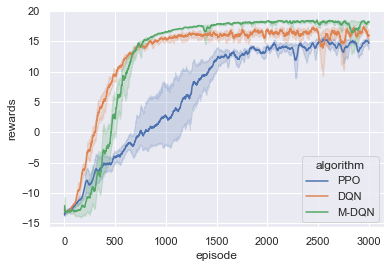

In [33]:
sns.set(rc={"figure.figsize":(6, 4)})
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v0.png", dpi=600)

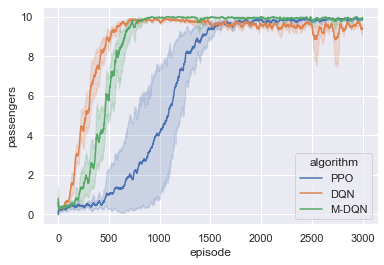

In [34]:
fig = sns.lineplot(data=df, x="episode", y="n_passengers", hue="algorithm")
fig.set(ylabel = "passengers")
fig.figure.savefig("/home/niko/Desktop/runs/n_passengers_v0.png", dpi=600)

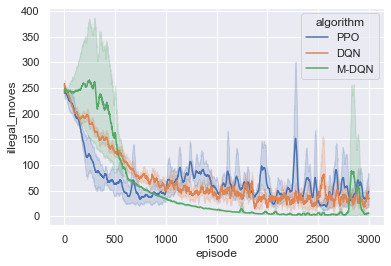

In [35]:
sns.lineplot(data=df, x="episode", y="illegal_moves", hue="algorithm")
fig.set(ylabel = "illegal moves")
fig.figure.savefig("/home/niko/Desktop/runs/illegal_moves_v0.png", dpi=600)

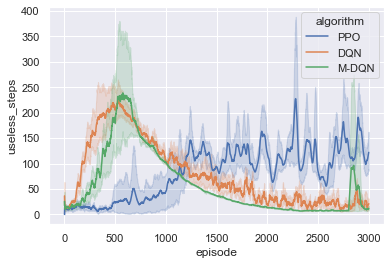

In [36]:
sns.lineplot(data=df, x="episode", y="useless_steps", hue="algorithm")
fig.set(ylabel = "useless steps")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v0.png", dpi=600)